<a href="https://colab.research.google.com/github/Pranayshukla0610/exploratory-data-analysis-python/blob/main/EDA_for_Student_Performance_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express
import plotly.express as px

In [11]:
df = pd.read_csv('/content/StudentPerformance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [13]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [14]:
df.shape

(10000, 6)

In [15]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


<Axes: >

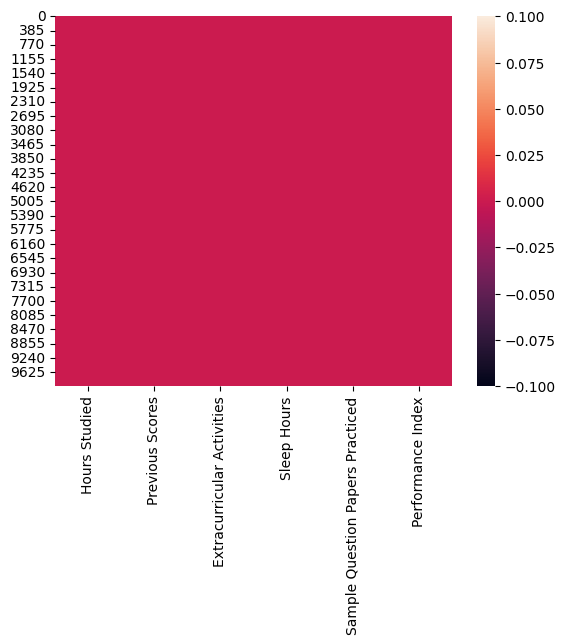

In [16]:
sns.heatmap(df.isnull())

In [18]:
mode_count = df['Extracurricular Activities'].value_counts()
fig = px.pie(values=mode_count.values,
             names=mode_count.index)

fig.update_layout(
    title="Pie Chart of Extracurricular Activities",
    plot_bgcolor="rgba(255, 255, 0, 0.5)",
    paper_bgcolor='black',
    font = dict(color="white")
)
fig.show()

In [19]:
df['Performance Class'] = np.where(df['Performance Index'] >= df["Performance Index"]. median(), 1, 0)

In [21]:
from plotly.graph_objs import Font
mode_counts = df['Performance Class'].value_counts()

label_map = {
    0: "High Performance",
    1: "Low Performance"
}

mode_counts.index = mode_counts.index.map(label_map)

fig = px.pie(
    values = mode_counts.values,
    names = mode_counts.index,
    title = "Performance Class Distribution"
)

fig.update_layout(
    plot_bgcolor = "rgba(255, 255, 0, 0.5)",
    paper_bgcolor = "black",
    font = dict(color = "white")
)

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Class'>

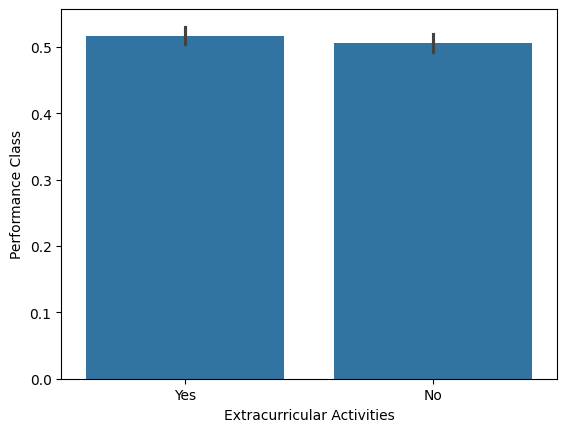

In [22]:
sns.barplot(x=df['Extracurricular Activities'], y=df['Performance Class'])

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

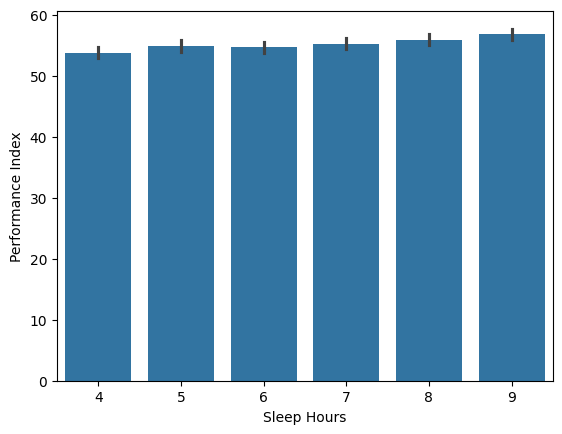

In [24]:
sns.barplot(x=df['Sleep Hours'], y=df['Performance Index'])

In [25]:
df['diff'] = df['Performance Index'] - df['Previous Scores']
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Performance Class,diff
0,7,99,Yes,9,1,91.0,1,-8.0
1,4,82,No,4,2,65.0,1,-17.0
2,8,51,Yes,7,2,45.0,0,-6.0
3,5,52,Yes,5,2,36.0,0,-16.0
4,7,75,No,8,5,66.0,1,-9.0


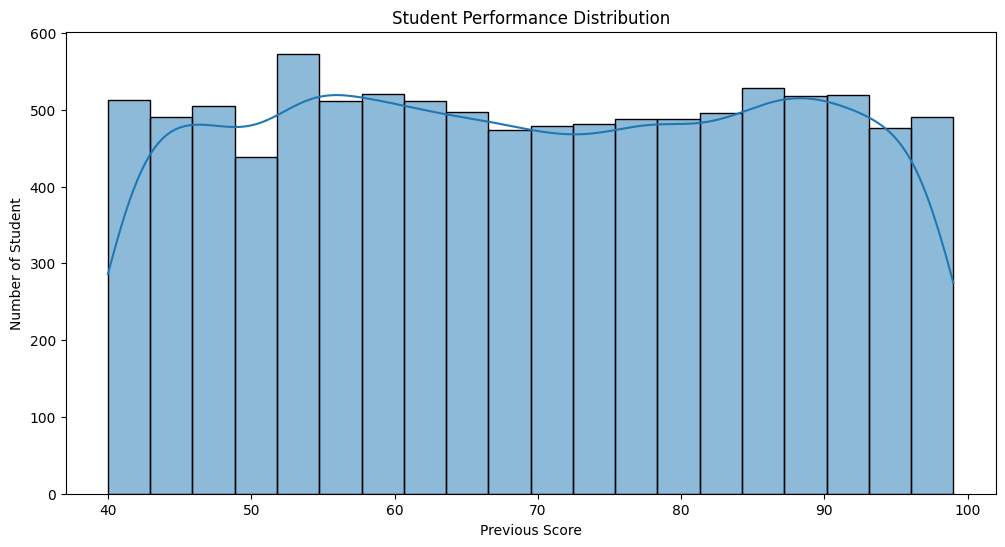

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(data = df, x='Previous Scores', bins=20, kde=True)
plt.title('Student Performance Distribution')
plt.xlabel('Previous Score')
plt.ylabel('Number of Student')
plt.show()

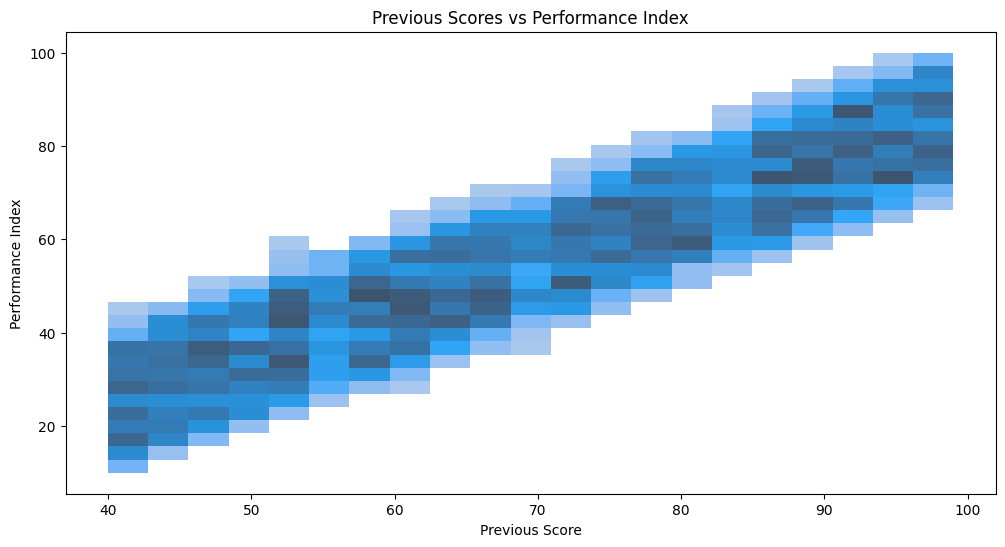

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Previous Scores',y='Performance Index')
plt.title("Previous Scores vs Performance Index")
plt.xlabel('Previous Score')
plt.ylabel('Performance Index')
plt.show()

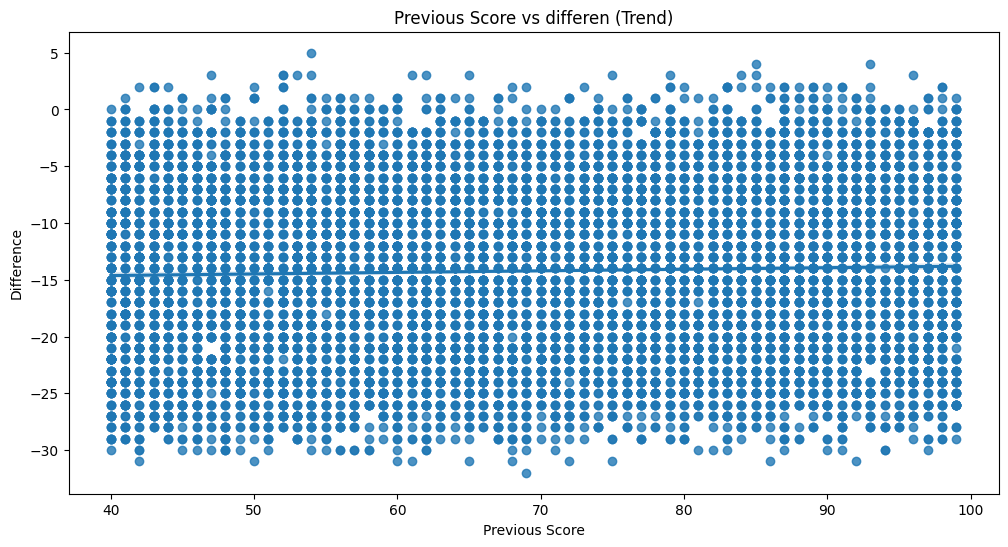

In [31]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='Previous Scores', y='diff')
plt.title("Previous Score vs differen (Trend)")
plt.xlabel('Previous Score')
plt.ylabel('Difference')
plt.show()

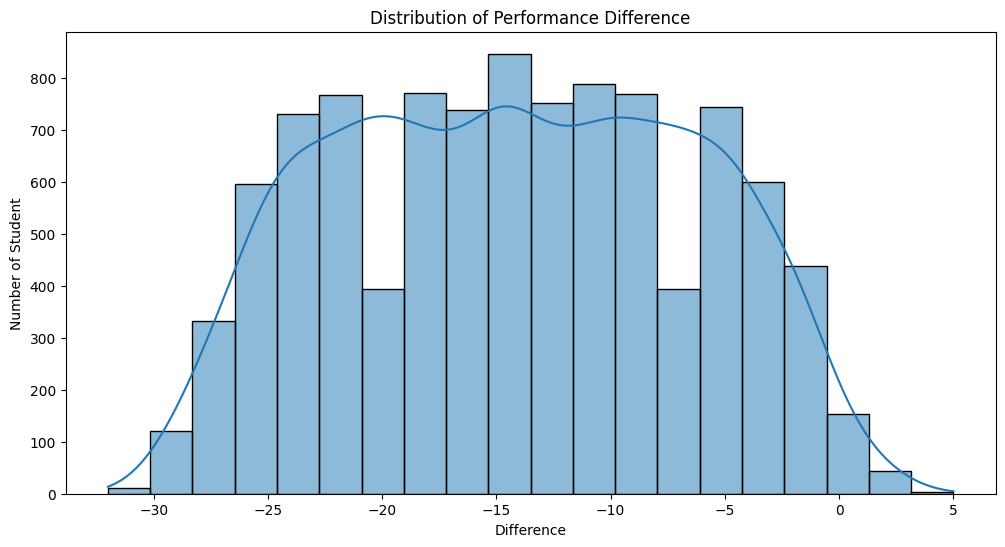

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(df['diff'], bins=20, kde=True)
plt.title("Distribution of Performance Difference")
plt.xlabel('Difference')
plt.ylabel('Number of Student')
plt.show()